## Observations and Insights 

One observation that can be seen is that there is a strong positive correlation between the average tumor volume of a mouse treated with Capomulin and its average weight. Another inference that can be drawn is that Capomulin and Ramicane seem to rise above the other treatment regimens in terms of total number of timepoints observed for their mice. Finally, another observation that can be seen is that Infubinol seems to be the only treatment regimen with an outlier in its final tumor volume data for mice treated with that regimen. 

In [51]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_results_df = pd.merge(mouse_metadata, study_results, how='outer', on="Mouse ID")
# Display the data table for preview
combined_results_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [52]:
# Checking the number of mice.
unique_mice = combined_results_df["Mouse ID"].unique()
len(unique_mice)

249

In [53]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = combined_results_df.duplicated(subset=["Mouse ID", "Timepoint"], keep=False)
duplicate_mice


0       False
1       False
2       False
3       False
4       False
        ...  
1888    False
1889    False
1890    False
1891    False
1892    False
Length: 1893, dtype: bool

In [54]:
duplicate_mice_true = duplicate_mice.index[duplicate_mice]
duplicate_mice_true

Int64Index([908, 909, 910, 911, 912, 913, 914, 915, 916, 917], dtype='int64')

In [55]:
# Optional: Get all the data for the duplicate mouse ID. 

In [56]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mice_df = combined_results_df.drop(labels=duplicate_mice_true)
clean_mice_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [57]:
# Checking the number of mice in the clean DataFrame.
unique_clean_mice = clean_mice_df["Mouse ID"].unique()
len(unique_clean_mice)


249

## Summary Statistics

In [58]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
mean_tumor_volumes = clean_mice_df.groupby(clean_mice_df["Drug Regimen"]).mean()["Tumor Volume (mm3)"]
mean_tumor_volumes
median_tumor_volumes = clean_mice_df.groupby(clean_mice_df["Drug Regimen"]).median()["Tumor Volume (mm3)"]
median_tumor_volumes
variance_tumor_volumes = clean_mice_df.groupby(clean_mice_df["Drug Regimen"]).var()["Tumor Volume (mm3)"]
variance_tumor_volumes
std_tumor_volumes = clean_mice_df.groupby(clean_mice_df["Drug Regimen"]).std()["Tumor Volume (mm3)"]
std_tumor_volumes
sem_tumor_volumes = clean_mice_df.groupby(clean_mice_df["Drug Regimen"]).sem()["Tumor Volume (mm3)"]
sem_tumor_volumes
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

tumor_volumes_df = pd.DataFrame({"Mean Tumor Volume (mm3)": mean_tumor_volumes, "Median Tumor Volume (mm3)": \
                                median_tumor_volumes, "Variance Tumor Volume (mm3)": variance_tumor_volumes, \
                                "Standard Deviation Tumor Volume (mm3)": std_tumor_volumes, "Standard Error of Mean Tumor \
                                Volume (mm3)": sem_tumor_volumes})
tumor_volumes_df



,Mean Tumor Volume (mm3),Median Tumor Volume (mm3),Variance Tumor Volume (mm3),Standard Deviation Tumor Volume (mm3),Standard Error of Mean Tumor Volume (mm3)
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.458254,50.854632,44.053659,6.637293,0.540135
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [59]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
aggregate_tumor_volumes = tumor_volumes_df.agg(['abs'])
aggregate_tumor_volumes

,Mean Tumor Volume (mm3),Median Tumor Volume (mm3),Variance Tumor Volume (mm3),Standard Deviation Tumor Volume (mm3),Standard Error of Mean Tumor Volume (mm3)
,abs,abs,abs,abs,abs
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.458254,50.854632,44.053659,6.637293,0.540135
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955


## Bar and Pie Charts

<AxesSubplot:title={'center':'Total                                                                                                     Timepoints for all Mice                                                                                                     by Drug Regimen'}, xlabel='Drug Regimen', ylabel='Timepoints'>

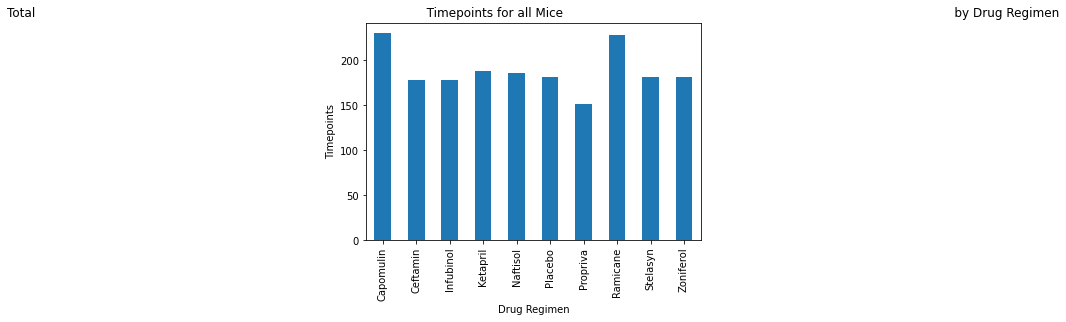

In [60]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
timepoints_plot = clean_mice_df.groupby(clean_mice_df["Drug Regimen"]).count()["Timepoint"].plot.bar(ylabel="Timepoints", \
                                                                                                    title="Total \
                                                                                                    Timepoints for all Mice \
                                                                                                    by Drug Regimen")
timepoints_plot


In [61]:
clean_mice_df["Drug Regimen"].unique()

array(['Ramicane', 'Capomulin', 'Infubinol', 'Placebo', 'Ceftamin',
       'Stelasyn', 'Zoniferol', 'Ketapril', 'Propriva', 'Naftisol'],
      dtype=object)

In [62]:
clean_mice_df.groupby(clean_mice_df["Drug Regimen"]).count()["Timepoint"]

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     151
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Timepoint, dtype: int64

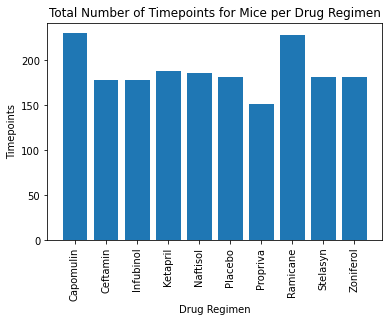

In [63]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
timepoints_pyplot_x = ["Capomulin", "Ceftamin", "Infubinol", "Ketapril", "Naftisol", "Placebo", "Propriva", \
                                 "Ramicane", "Stelasyn", "Zoniferol"]
timepoints_pyplot_y = [230, 178, 178, 188, 186, 181, 151, 228, 181, 182]
timepoints_pyplot_x_axis = np.arange(0, len(timepoints_pyplot_x))
tick_locations = []
for x in timepoints_pyplot_x_axis: 
    tick_locations.append(x)

plt.bar(timepoints_pyplot_x_axis, timepoints_pyplot_y)
plt.xticks(tick_locations, timepoints_pyplot_x, rotation=90)
plt.title("Total Number of Timepoints for Mice per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Timepoints")
plt.show()

<AxesSubplot:title={'center':'Gender Distribution of Mice'}, ylabel='Sex'>

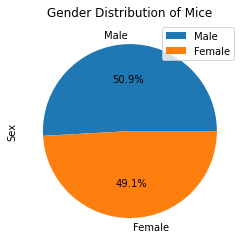

In [64]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
# mice_gender_pie_plot = clean_mice_df.plot.pie(clean_mice_df["Sex"])
# mice_gender_pie_plot
clean_mice_df["Sex"].value_counts().plot(kind='pie', autopct="%1.1f%%", title="Gender Distribution of Mice", legend=True)

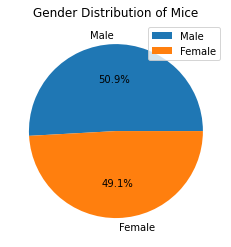

In [65]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(clean_mice_df["Sex"].value_counts(), labels=["Male", "Female"], autopct="%1.1f%%")
plt.title("Gender Distribution of Mice")
plt.legend()
plt.show()


## Quartiles, Outliers and Boxplots

In [66]:
# Calculate the final tumor volume of each mouse for the following treatment regimen:  
# Capomulin
capomulin_df = clean_mice_df.loc[clean_mice_df["Drug Regimen"] == "Capomulin"]
capomulin_df.head(15)
capomulin_final_volumes = capomulin_df.groupby(capomulin_df["Mouse ID"]).last()["Tumor Volume (mm3)"]
capomulin_final_volumes

Mouse ID
b128    38.982878
b742    38.939633
f966    30.485985
g288    37.074024
g316    40.159220
i557    47.685963
i738    37.311846
j119    38.125164
j246    38.753265
l509    41.483008
l897    38.846876
m601    28.430964
m957    33.329098
r157    46.539206
r554    32.377357
r944    41.581521
s185    23.343598
s710    40.728578
t565    34.455298
u364    31.023923
v923    40.658124
w150    39.952347
w914    36.041047
x401    28.484033
y793    31.896238
Name: Tumor Volume (mm3), dtype: float64

In [67]:
# Calculate the final tumor volume of each mouse for the following treatment regimen:  
# Ramicane
ramicane_df = clean_mice_df.loc[clean_mice_df["Drug Regimen"] == "Ramicane"]
ramicane_df.head(15)
ramicane_final_volumes = ramicane_df.groupby(ramicane_df["Mouse ID"]).last()["Tumor Volume (mm3)"]
ramicane_final_volumes

Mouse ID
a411    38.407618
a444    43.047543
a520    38.810366
a644    32.978522
c458    38.342008
c758    33.397653
d251    37.311236
e662    40.659006
g791    29.128472
i177    33.562402
i334    36.374510
j913    31.560470
j989    36.134852
k403    22.050126
m546    30.564625
n364    31.095335
q597    45.220869
q610    36.561652
r811    37.225650
r921    43.419381
s508    30.276232
u196    40.667713
w678    43.166373
y449    44.183451
z578    30.638696
Name: Tumor Volume (mm3), dtype: float64

In [68]:
# Calculate the final tumor volume of each mouse for the following treatment regimen:  
# Infubinol
infubinol_df = clean_mice_df.loc[clean_mice_df["Drug Regimen"] == "Infubinol"]
infubinol_df.head(15)
infubinol_final_volumes = infubinol_df.groupby(infubinol_df["Mouse ID"]).last()["Tumor Volume (mm3)"]
infubinol_final_volumes

Mouse ID
a203    67.973419
a251    65.525743
a577    57.031862
a685    66.083066
c139    72.226731
c326    36.321346
c895    60.969711
e476    62.435404
f345    60.918767
i386    67.289621
k483    66.196912
k804    62.117279
m756    47.010364
n671    60.165180
o809    55.629428
o813    45.699331
q132    54.656549
s121    55.650681
v339    46.250112
v719    54.048608
v766    51.542431
w193    50.005138
w584    58.268442
y163    67.685569
z581    62.754451
Name: Tumor Volume (mm3), dtype: float64

In [69]:
# Calculate the final tumor volume of each mouse for the following treatment regimen:  
# Ceftamin
ceftamin_df = clean_mice_df.loc[clean_mice_df["Drug Regimen"] == "Ceftamin"]
ceftamin_df.head(15)
ceftamin_final_volumes = ceftamin_df.groupby(ceftamin_df["Mouse ID"]).last()["Tumor Volume (mm3)"]
ceftamin_final_volumes

Mouse ID
a275    62.999356
b447    45.000000
b487    56.057749
b759    55.742829
f436    48.722078
h531    47.784682
j296    61.849023
k210    68.923185
l471    67.748662
l490    57.918381
l558    46.784535
l661    59.851956
l733    64.299830
o287    59.741901
p438    61.433892
q483    64.192341
t573    45.000000
u149    52.925348
u153    45.000000
w151    67.527482
x226    45.000000
x581    64.634949
x822    61.386660
y769    68.594745
y865    64.729837
Name: Tumor Volume (mm3), dtype: float64

In [70]:
# Start by getting the last (greatest) timepoint for each mouse
greatest_timepoint_df = clean_mice_df.groupby(["Mouse ID"])["Timepoint"].max()
greatest_timepoint_df
greatest_timepoint_df = greatest_timepoint_df.reset_index()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
greatest_timepoint_combined = greatest_timepoint_df.merge(clean_mice_df, on=["Mouse ID", "Timepoint"], how="left")
greatest_timepoint_combined

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
244,z435,10,Propriva,Female,12,26,48.710661,0
245,z578,45,Ramicane,Male,11,16,30.638696,0
246,z581,45,Infubinol,Female,24,25,62.754451,3
247,z795,45,Naftisol,Female,13,29,65.741070,3


In [71]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
capomulin_tumor_volumes = greatest_timepoint_combined.loc[greatest_timepoint_combined["Drug Regimen"] == "Capomulin"]
capomulin_tumor_volumes
capomulin_tumor_groupby = capomulin_tumor_volumes.groupby(["Mouse ID"]).max()["Tumor Volume (mm3)"]
capomulin_tumor_groupby
capomulin_volume_data = []
for volume in capomulin_tumor_groupby:
    capomulin_volume_data.append(volume)
capomulin_volume_data
ramicane_tumor_volumes = greatest_timepoint_combined.loc[greatest_timepoint_combined["Drug Regimen"] == "Ramicane"]
ramicane_tumor_volumes
ramicane_tumor_groupby = ramicane_tumor_volumes.groupby(["Mouse ID"]).max()["Tumor Volume (mm3)"]
ramicane_tumor_groupby
ramicane_volume_data = []
for volume in ramicane_tumor_groupby:
    ramicane_volume_data.append(volume)
ramicane_volume_data
infubinol_tumor_volumes = greatest_timepoint_combined.loc[greatest_timepoint_combined["Drug Regimen"] == "Infubinol"]
infubinol_tumor_volumes
infubinol_tumor_groupby = infubinol_tumor_volumes.groupby(["Mouse ID"]).max()["Tumor Volume (mm3)"]
infubinol_tumor_groupby
infubinol_volume_data = []
for volume in infubinol_tumor_groupby:
    infubinol_volume_data.append(volume)
infubinol_volume_data
ceftamin_tumor_volumes = greatest_timepoint_combined.loc[greatest_timepoint_combined["Drug Regimen"] == "Ceftamin"]
ceftamin_tumor_volumes
ceftamin_tumor_groupby = ceftamin_tumor_volumes.groupby(["Mouse ID"]).max()["Tumor Volume (mm3)"]
ceftamin_tumor_groupby
ceftamin_volume_data = []
for volume in ceftamin_tumor_groupby:
    ceftamin_volume_data.append(volume)
ceftamin_volume_data

# Calculate the IQR and quantitatively determine if there are any potential outliers. Use upper and lower bounds to find them.
capomulin_quartiles = np.quantile(capomulin_volume_data, [0.25, 0.50, 0.75])
capomulin_lowerq = capomulin_quartiles[0]
capomulin_upperq = capomulin_quartiles[2]
capomulin_iqr = capomulin_upperq - capomulin_lowerq
capomulin_iqr
capomulin_upper_bound = capomulin_upperq + (1.5 * capomulin_iqr)
capomulin_upper_bound
capomulin_lower_bound = capomulin_lowerq - (1.5 * capomulin_iqr)
capomulin_lower_bound
capomulin_volume_data.sort()
capomulin_volume_data
ramicane_quartiles = np.quantile(ramicane_volume_data, [0.25, 0.50, 0.75])
ramicane_lowerq = ramicane_quartiles[0]
ramicane_upperq = ramicane_quartiles[2]
ramicane_iqr = ramicane_upperq - ramicane_lowerq
ramicane_iqr
ramicane_upper_bound = ramicane_upperq + (1.5 * ramicane_iqr)
ramicane_upper_bound
ramicane_lower_bound = ramicane_lowerq - (1.5 * ramicane_iqr)
ramicane_lower_bound
ramicane_volume_data.sort()
ramicane_volume_data
infubinol_quartiles = np.quantile(infubinol_volume_data, [0.25, 0.50, 0.75])
infubinol_lowerq = infubinol_quartiles[0]
infubinol_upperq = infubinol_quartiles[2]
infubinol_iqr = infubinol_upperq - infubinol_lowerq
infubinol_iqr
infubinol_upper_bound = infubinol_upperq + (1.5 * infubinol_iqr)
infubinol_upper_bound
infubinol_lower_bound = infubinol_lowerq - (1.5 * infubinol_iqr)
infubinol_lower_bound
infubinol_volume_data.sort()
infubinol_volume_data
ceftamin_quartiles = np.quantile(ceftamin_volume_data, [0.25, 0.50, 0.75])
ceftamin_lowerq = ceftamin_quartiles[0]
ceftamin_upperq = ceftamin_quartiles[2]
ceftamin_iqr = ceftamin_upperq - ceftamin_lowerq
ceftamin_iqr
ceftamin_upper_bound = ceftamin_upperq + (1.5 * ceftamin_iqr)
ceftamin_upper_bound
ceftamin_lower_bound = ceftamin_lowerq - (1.5 * ceftamin_iqr)
ceftamin_lower_bound
ceftamin_volume_data.sort()
ceftamin_volume_data
    

[45.0,
 45.0,
 45.0,
 45.0,
 46.78453491,
 47.7846818,
 48.72207785,
 52.92534846,
 55.74282869,
 56.05774909,
 57.91838132,
 59.74190064,
 59.85195552,
 61.38666032,
 61.43389223,
 61.84902336,
 62.99935619,
 64.19234114,
 64.29983003,
 64.63494887,
 64.72983655,
 67.52748237,
 67.74866174,
 68.59474498,
 68.92318457]

C:\Users\User 1\AppData\Local\Temp\ipykernel_15764\2208303833.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(drug_labels)


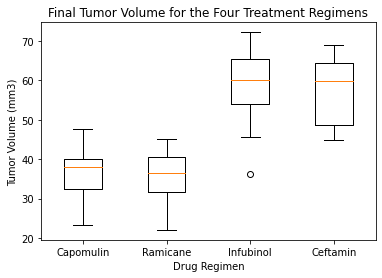

In [72]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
tumor_data = [capomulin_volume_data, ramicane_volume_data, infubinol_volume_data, ceftamin_volume_data]
fig1, ax1 = plt.subplots()
drug_labels = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
ax1.set_title("Final Tumor Volume for the Four Treatment Regimens")
plt.xlabel("Drug Regimen")
plt.ylabel("Tumor Volume (mm3)")
ax1.set_xticklabels(drug_labels)
ax1.boxplot(tumor_data)
plt.show()

## Line and Scatter Plots

Text(0.5, 1.0, 'Line Graph of Mouse Treated with Capomulin')

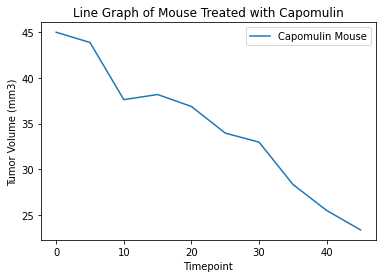

In [83]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capomulin_df.head(15)
capomulin_specific_mice = capomulin_df.loc[capomulin_df["Mouse ID"] == 's185']
capomulin_specific_mice
capomulin_specific_mice_volume = capomulin_specific_mice["Tumor Volume (mm3)"]
capomulin_specific_mice_volume
capomulin_specific_mice_timepoint = capomulin_specific_mice["Timepoint"]
capomulin_specific_mice_timepoint
plt.plot(capomulin_specific_mice_timepoint, capomulin_specific_mice_volume, label="Capomulin Mouse")
plt.legend()
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Line Graph of Mouse Treated with Capomulin")

Text(0, 0.5, 'Aveage Mouse Weight (g)')

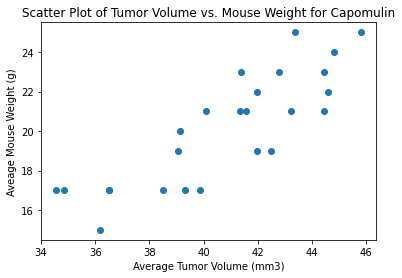

In [102]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
average_capomulin_volume = capomulin_df.groupby(capomulin_df["Mouse ID"]).mean()["Tumor Volume (mm3)"]
average_capomulin_volume
capomulin_df.head(15)
average_capomulin_mouse_weight = capomulin_df.groupby(capomulin_df["Mouse ID"]).mean()["Weight (g)"]
average_capomulin_mouse_weight
plt.scatter(average_capomulin_volume, average_capomulin_mouse_weight)
plt.title("Scatter Plot of Tumor Volume vs. Mouse Weight for Capomulin")
plt.xlabel("Average Tumor Volume (mm3)")
plt.ylabel("Aveage Mouse Weight (g)")


## Correlation and Regression

Text(36, 22, 'y = 0.74x + -10.15')

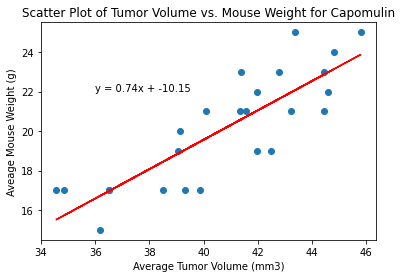

In [108]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
capomulin_correlation = st.pearsonr(average_capomulin_volume, average_capomulin_mouse_weight)
capomulin_correlation[0]
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(average_capomulin_volume, average_capomulin_mouse_weight)
regress_values = slope * average_capomulin_volume + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
plt.scatter(average_capomulin_volume, average_capomulin_mouse_weight)
plt.plot(average_capomulin_volume, regress_values, "r-")
plt.title("Scatter Plot of Tumor Volume vs. Mouse Weight for Capomulin")
plt.xlabel("Average Tumor Volume (mm3)")
plt.ylabel("Aveage Mouse Weight (g)")
plt.annotate(line_eq, (36, 22))